
## The goal of the project is to explore the data and make some relevant analyses about the final grade in mathematics of portugese student regarding differents factors. And especially their alcohol consumption. We would like to predict their final grade using a ML model after that and see what affect their succes.

## Attributes
```
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - 1 hour)
studytime - weekly study time (numeric: 1 - 10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

In [ ]:
df = pd.read_csv("/work/student-mat.csv", index_col = False)
df.shape


(395, 33)

In [ ]:
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.tail()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

##### We can see with our shape we have 395 rows, and by checking the info, all columns are filled. We have 395 values for each columns. We can confirm by checking isnull() also. So there is no missing values

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Data visualization

## Let see first the correlation 

Text(0.5, 1.0, 'Correlation Heatmap')

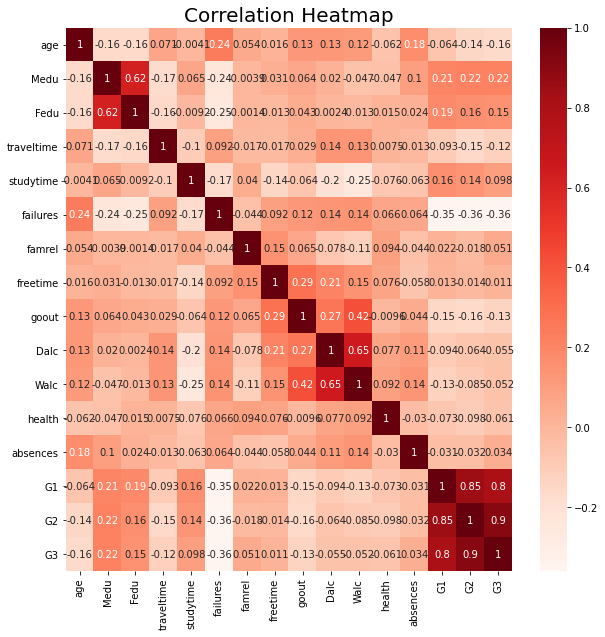

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)


#### We can see we have high correlation between the different grades 1, 2 and 3. Then we also have correlation between father and mother education which could lead to think that couple with nice level of studies stay together. We also have a small corellation between the weekend alcohol consumption and how often they go out

Text(0.5, 1.0, 'G1 score vs G2 score')

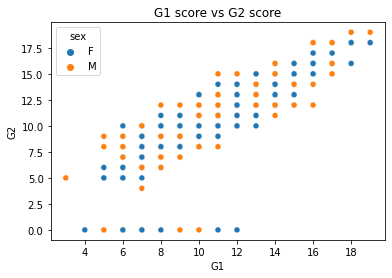

In [ ]:
#Let's plot the correlation, we can see the linear relation between g1 and g2

sns.scatterplot(x = df.G1, y = df.G2, hue = df.sex)
plt.title("G1 score vs G2 score")

#### G1 and G2:
#### Those you get good grades (>12.5) in G1 no matter what gender she belongs, no matter how much she consumes alcohol she will get good grades in the G2
#### Those you get less grade in G1 no matter what gender she belongs, no matter how much she consumes alcohol she will get less grades in the G2
#### Also there lies some outliers which doesn't follow this pattern

Text(0.5, 1.0, 'G2 score vs G3 score')

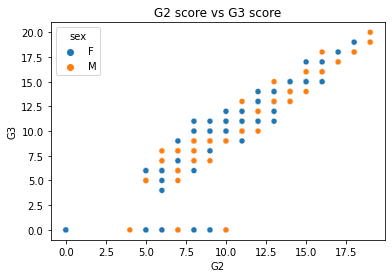

In [ ]:
sns.scatterplot(x = df.G2, y = df.G3, hue = df.sex)
plt.title("G2 score vs G3 score")

#### G2 and G3

#### Those you get good grades (>12.5) in G2 no matter what gender she belongs, no matter how much she consumes alcohol she will get good grades in the G2
#### Those you get less grade in G2 no matter what gender she belongs, no matter how much she consumes alcohol she will get less grades in the G2
#### Also there lies some outliers which doesn't follow this pattern

## How the students are distributed through our data ?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


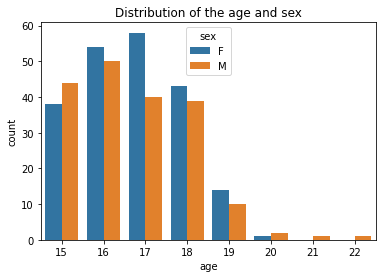

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


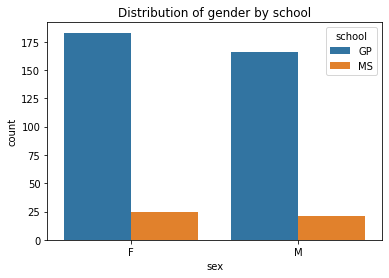

In [ ]:
sns.countplot(df.age , data = df, hue = 'sex')
plt.title ('Distribution of the age and sex')
plt.show()
sns.countplot(df.sex, data = df, hue = 'school')
plt.title ('Distribution of gender by school')
plt.show()

#### We can see in our data we have lots of teenagers, but most of theme are between 15 and 19 yo. And we got a bit more of girls. Then we have more girls than boy but it seems quite equals. We have a lot more students in GP school

## In which area the student live ?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Living areas')

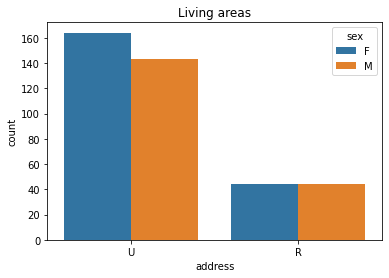

In [ ]:
sns.countplot(df.address, data = df, hue = 'sex')
plt.title("Living areas")

#### We can see we have more students which live in the urban area. It can have an impact of their alcohol comsuption, saying that they tend to go out more in urban area

## Mother's and Father's job of student

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


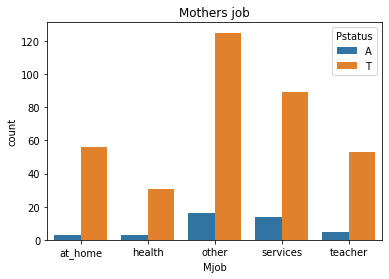

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fathers job')

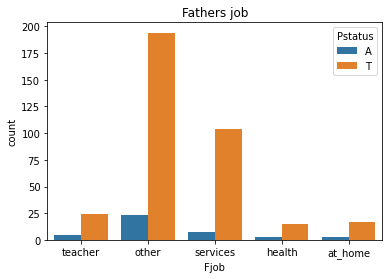

In [ ]:
sns.countplot(df.Mjob, hue = df.Pstatus)
plt.title("Mothers job")
plt.show()
sns.countplot(df.Fjob, hue = df.Pstatus)
plt.title("Fathers job")

#### Less than 20% are teachers, it can have an impact maybe on their grades. Same for health job and mostly of their parents live together, it might have an impact maybe on their alcohool consumption.

## Are their travel time long ?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Traveltime')

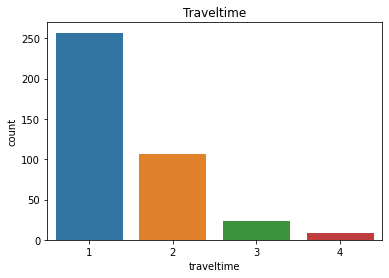

In [ ]:
sns.countplot(df.traveltime)
plt.title("Traveltime")

#### Most of these students are close to their school

## Are they skipping school a lot ?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5.708860759493671

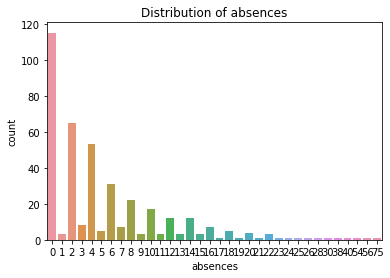

In [ ]:
sns.countplot(df.absences)
plt.title("Distribution of absences")
df.absences.mean()

#### The number of absences is not so high, the trends is around 6 abs per student

## Do they have extra activites ?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Activities')

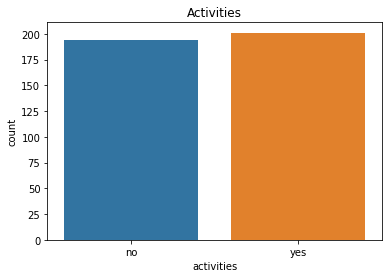

In [ ]:
sns.countplot(df.activities)
plt.title("Activities")

#### Quite 50/50 

## What is their weekly studytime

Text(0.5, 1.0, 'Weekly study time\n')

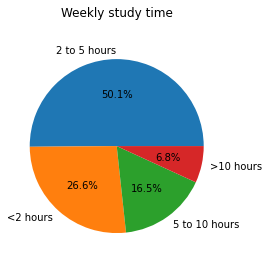

In [ ]:
plt.pie(df['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
plt.title("Weekly study time\n")

#### We can see that half of the students tend to study 2 to 5 hours per week, one over three (1/3) tend to study less than 2 hours which is very low no matter the age, and few of them study more than 10 hours. We can infer that we have kind of lazy students. We can also think thir alcohol comsuption can have an impact on their study time

Text(0.5, 1.0, 'Trends with Study Time and Grade')

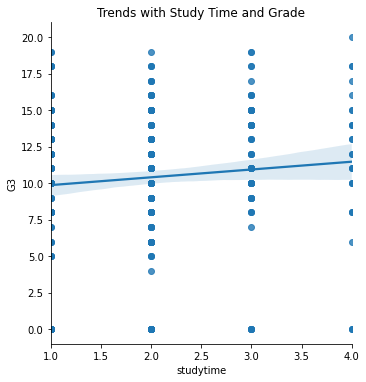

In [ ]:
sns.lmplot(x = 'studytime',y = 'G3', data = df)
plt.title('Trends with Study Time and Grade')


#### Logically the more the student will study the more they will have better grade

Text(0.5, 1.0, 'Trends with their alcohol comsuption and Grade')

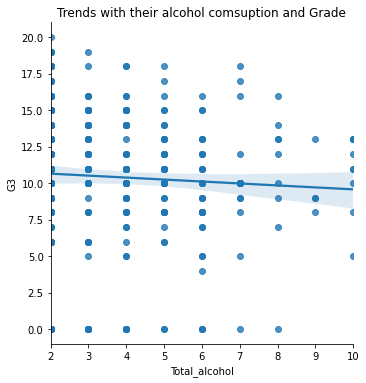

In [ ]:
df['Total_alcohol'] = df['Dalc'] + df['Walc']
sns.lmplot(x = 'Total_alcohol',y = 'G3', data = df)
plt.title('Trends with their alcohol comsuption and Grade')

#### We remark a deacrease, more they consume alcohol less their grade will be

## Does extra educational support affect the grade ?

Text(10.049999999999997, 0.5, 'Avg. Grade')

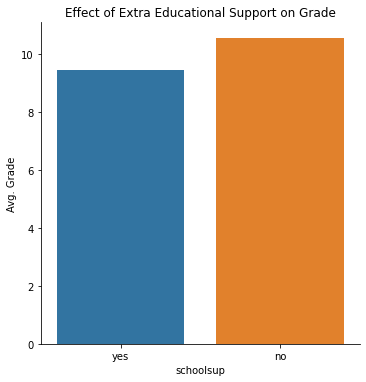

In [ ]:
sns.catplot(x = 'schoolsup',y = 'G3', data = df, kind = 'bar', ci = None)
plt.title('Effect of Extra Educational Support on Grade')
plt.ylabel('Avg. Grade')

#### Weirdly we can see that student with no additional support have better grades than student with. Maybe it is because those who take support have real troubles with school

## Do they have internet connection ?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Internet connexion')

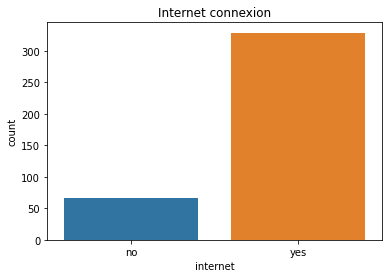

In [ ]:
sns.countplot(df.internet)
plt.title("Internet connexion")

#### The majority of students have access to internet and so could have better grades

## How is their freetime and are they going out during ?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Freetime and hanging')

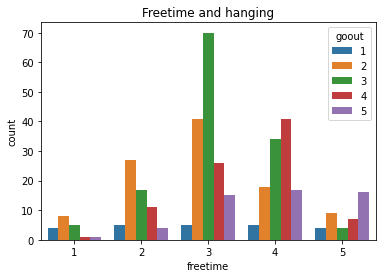

In [ ]:
sns.countplot(df.freetime, hue = df.goout)
plt.title("Freetime and hanging")

#### We can see students like to hang out during their freetime here for example at level 3 we have lots of them

Text(0.5, 1.0, 'Hanging out and freetime')

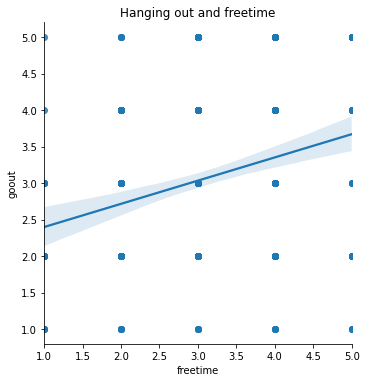

In [ ]:
sns.lmplot(x = 'freetime',y = 'goout', data = df)
plt.title("Hanging out and freetime")

Text(0.5, 1.0, 'Going out on the final grade')

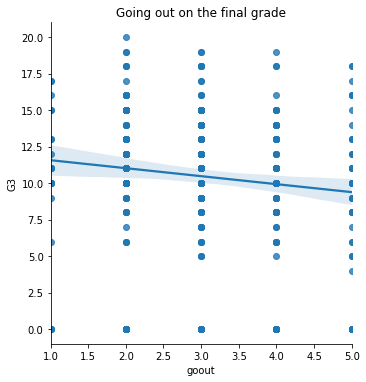

In [ ]:
sns.lmplot(x = 'goout',y = 'G3', data = df)
plt.title("Going out on the final grade")

Text(0.5, 1.0, 'Going out on alcohol')

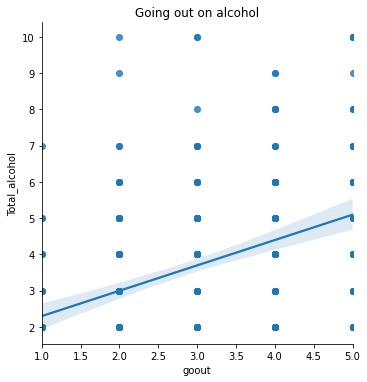

In [ ]:
sns.lmplot(x = 'goout',y = 'Total_alcohol', data = df)
plt.title("Going out on alcohol")

## What cause their alcohol consumption ?

## Does bad relathionship over a family can lead on a higher alcohol consumption 

<function matplotlib.pyplot.show(close=None, block=None)>

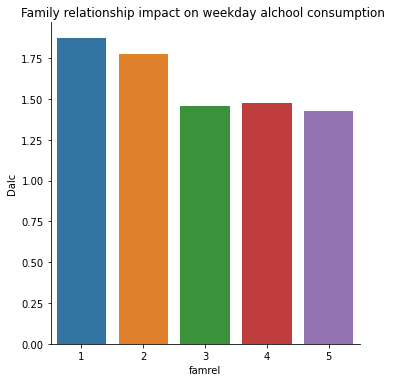

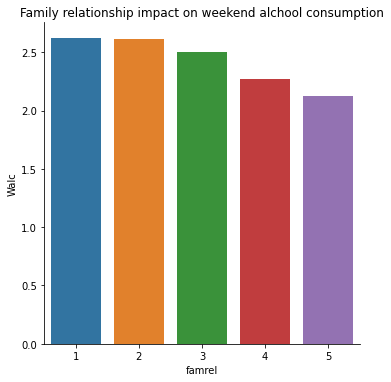

In [ ]:
sns.catplot(x = 'famrel',y = 'Dalc', data = df, kind = 'bar', ci = None)
plt.title("Family relationship impact on weekday alchool consumption ")
plt.show
sns.catplot(x = 'famrel',y = 'Walc', data = df, kind = 'bar', ci = None)
plt.title("Family relationship impact on weekend alchool consumption")
plt.show

Text(0.5, 1.0, 'Trends with their family relationship and Grade')

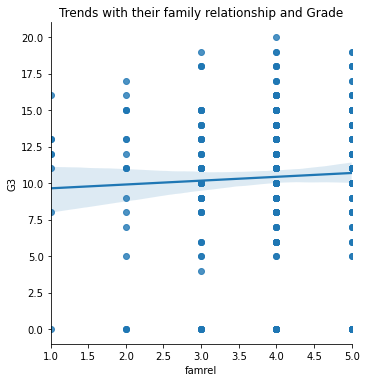

In [ ]:
sns.lmplot(x = 'famrel',y = 'G3', data = df)
plt.title('Trends with their family relationship and Grade')

#### We can see here more we have a nice family relationship, less student consume alcohol. It can sounds logic

## Let's see combine the total weekly alcohol 

Text(0.5, 1.0, 'Family relathionship impact on total alchool consumption ')

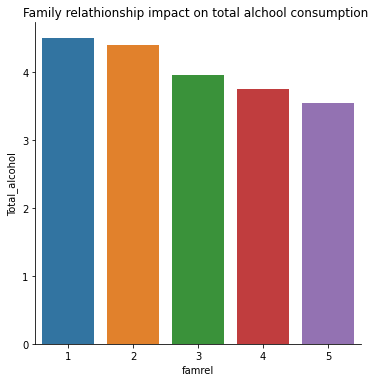

In [ ]:

sns.catplot(x = 'famrel',y = 'Total_alcohol', data = df, kind = 'bar', ci = None)
plt.title("Family relathionship impact on total alchool consumption ")

#### Same result as before

Text(0.5, 1.0, 'Alcohol on study time')

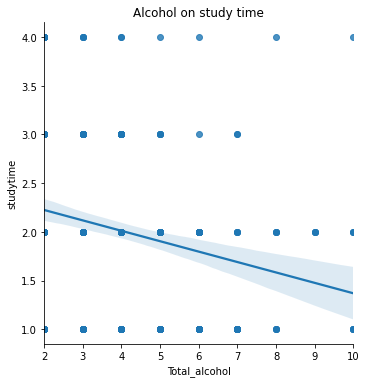

In [ ]:
sns.lmplot(x = 'Total_alcohol',y = 'studytime', data = df)
plt.title('Alcohol on study time')

## Does romantinc relationship impact their alcohol consumption ?

<function matplotlib.pyplot.show(close=None, block=None)>

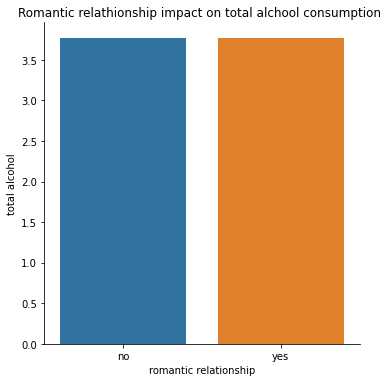

In [ ]:
sns.catplot(x = 'romantic',y = 'Total_alcohol', data = df, kind = 'bar', ci = None)
plt.ylabel('total alcohol')
plt.xlabel('romantic relationship')
plt.title("Romantic relathionship impact on total alchool consumption ")
plt.show

#### We see its 50/50, there is no real impact if they are single or not on their alcohol consumption

## Does more extrovert student consume more alcohol ? (by going out etc)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


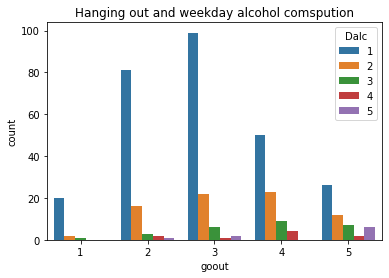

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hanging out and weekends alcohol comspution')

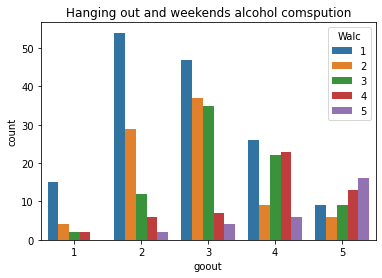

In [ ]:
sns.countplot(df.goout, hue = df.Dalc)
plt.title("Hanging out and weekday alcohol comspution")
plt.show()
sns.countplot(df.goout, hue = df.Walc)
plt.title("Hanging out and weekends alcohol comspution")

#### Lot's of student consume alcohol here. We can see that they consume more alcohol going out on the week end than in the week. More we tend to 5 rate more the extreme value augment for alcohol comsuption

## Let's now compare their final grades between gender in mathematics here

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Men vs Women on G3 grade')

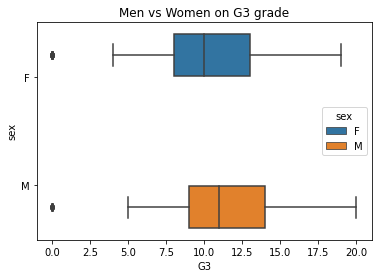

In [ ]:
# Let's consider only g3 which is the final grade

sns.boxplot(df.G3, df.sex , data = df, hue = 'sex')
plt.title ('Men vs Women on G3 grade')

#### We remark that boys have better result in their final grade than girls in maths, the mediane is higher

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


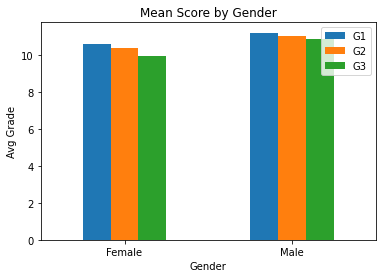

In [ ]:
ax = df.groupby('sex')['G1', 'G2', 'G3'].mean().plot(kind = 'bar')
plt.title('Mean Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Grade')
plt.legend(loc = 'upper right')
ax.set_xticklabels(['Female', 'Male'], rotation = 360)
plt.show()

#### Here the mean score of boys are higher than girls on every grades, as the previous boxplot also confirm that

## Now let's see if their final grades depend on their parents education

In [ ]:
 df.groupby('Medu')['G3'].mean()

Medu
0    13.000000
1     8.677966
2     9.728155
3    10.303030
4    11.763359
Name: G3, dtype: float64

In [ ]:
df.groupby('Fedu')['G3'].mean()

Fedu
0    13.000000
1     9.158537
2    10.260870
3    10.660000
4    11.364583
Name: G3, dtype: float64

#### We remark a small relation that more the parents did studies, more their child's grades increased, but it is very a low increase so its not so relevant with our data

## And see if the alcohol have an impact on the final grade

In [ ]:
df.groupby('Total_alcohol')['G1'].mean()

Total_alcohol
2     11.206667
3     11.227273
4     11.100000
5     10.800000
6      9.714286
7     10.176471
8     10.000000
9      9.500000
10    10.444444
Name: G1, dtype: float64

In [ ]:
df.groupby('Total_alcohol')['G2'].mean()

Total_alcohol
2     11.086667
3     10.651515
4     10.800000
5     10.844444
6      9.200000
7     10.411765
8     10.777778
9      9.250000
10    10.777778
Name: G2, dtype: float64

In [ ]:
df.groupby('Total_alcohol')['G3'].mean()

Total_alcohol
2     10.806667
3     10.272727
4     10.366667
5     10.555556
6      9.000000
7     10.235294
8     10.444444
9      9.750000
10    10.666667
Name: G3, dtype: float64

Text(0, 0.5, 'Average G3')

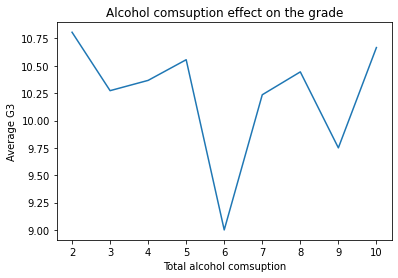

In [ ]:
x = df.groupby('Total_alcohol')['G3'].mean()
plt.plot(x)
plt.title("Alcohol comsuption effect on the grade")
plt.xlabel("Total alcohol comsuption")
plt.ylabel("Average G3")

#### We do not remark clearly an explanation of the alcohol on the final grade here regarding for example the student who consumes 6/10 alcohol per week has a lower average than the student who comsumes a lot more of alcool 10/10

# Machine Learning part

### We will use a copy of our native dataset to not alterate the EDA

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_ml = df.copy()
df_ml_G3 = df.copy()
df_ml_G3 = df_ml_G3.G3
df_ml = df_ml.drop(["Walc", "Dalc", "G3"], axis = 1)

df_ml['school'] = df_ml['school'].map({'GP': 0, 'MS': 1}).astype(int)
df_ml['sex'] = df_ml['sex'].map({'M': 0, 'F': 1}).astype(int)
df_ml['address'] = df_ml['address'].map({'R': 0, 'U': 1}).astype(int)
df_ml['famsize'] = df_ml['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
df_ml['Pstatus'] = df_ml['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
df_ml['Mjob'] = df_ml['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_ml['Fjob'] = df_ml['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_ml['reason'] = df_ml['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
df_ml['guardian'] = df_ml['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
df_ml['schoolsup'] = df_ml['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
df_ml['famsup'] = df_ml['famsup'].map({'no': 0, 'yes': 1}).astype(int)
df_ml['paid'] = df_ml['paid'].map({'no': 0, 'yes': 1}).astype(int)
df_ml['activities'] = df_ml['activities'].map({'no': 0, 'yes': 1}).astype(int)
df_ml['nursery'] = df_ml['nursery'].map({'no': 0, 'yes': 1}).astype(int)
df_ml['higher'] = df_ml['higher'].map({'no': 0, 'yes': 1}).astype(int)
df_ml['internet'] = df_ml['internet'].map({'no': 0, 'yes': 1}).astype(int)
df_ml['romantic'] = df_ml['romantic'].map({'no': 0, 'yes': 1}).astype(int)


In [ ]:
def trainModel(Standard = True, MinMax = False, shuffled = True):
    scoresTest = []
    scoresTrain = []
    model = LinearRegression()
    for i in range(0, 50):
        X_train, X_test, y_train, y_test = train_test_split(df_ml, df_ml_G3, test_size = 0.2, shuffle = shuffled, random_state = np.random.randint(2**32)) 
        if(MinMax):
            scalerMinMax = MinMaxScaler()
            scalerMinMax.fit_transform(df_ml)
        if(Standard):
            scalerStand = StandardScaler()
            scalerStand.fit_transform(df_ml)
        model.fit(X_train, y_train)
        finalGradePredict = model.predict(X_test)
        scoresTest.append(model.score(X_test, y_test))
        scoresTrain.append(model.score(X_train, y_train))
    print("Best train score : ", max(scoresTrain), "\nBest test score : ", max(scoresTest))

Best train score :  0.8748313033306121 
Best test score :  0.8758480636334769


ValueError: x and y must be the same size

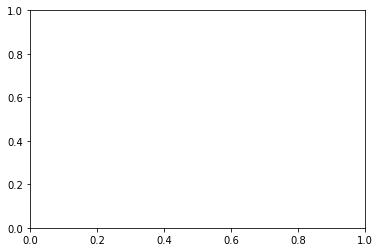

In [ ]:
trainModel()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67a46d19-d76b-4082-aee6-ca33c09eb1f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>